# Examen final

## 1) Integración estocastica

### Modulos

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import t
import time

### Funciones relevantes

In [6]:
def h(u,v,x):
    return t.pdf(u*x,df=v)*x

Tarda al rededor de 20 segundo en realizar el millón de simulaciones

In [7]:
def monteCarlo(x,v, n=100000):
    U=np.random.uniform(0,1, size=n)
    return np.vectorize(h)(U,v,x).mean()

In [8]:
def getValorCritico(alpha, v, max_iter=14):
    mc=100
    a= 0
    if(v==1):
        b=350
    else:
        b=40
    x=0
    prob= (1/2 -alpha)
    limite= .001
    ite=1
    #print(f"mc:{mc}, prob= {prob}, dif= {mc-prob}")
    while(abs(mc-prob)>limite):
        x= (a+b)/2
        mc=monteCarlo(x,v)
        #print(f"MC= {mc}, x={x}, dif= {mc-prob}")
        if(mc<prob):
            a=x
        else: 
            b=x
        if(ite>max_iter):
            print("Se excedio el número de intentos")
            break
        ite+=1
    return x

In [16]:
def crearTabla(ls_alphas,ls_v):
    dc={"Vc "+key:[] for key in [str(1-alpha) for alpha in ls_alphas ]}
    dc["V"]= []
    for v in ls_v:
        dc["V"].append(v)
        print(f"Vamos en el grado de libertad {v}")
        for alpha in ls_alphas:
            print(f"\tVamos en el alpha={alpha}")
            dc["Vc "+str(1-alpha)].append(getValorCritico(alpha,v))
            
    return dc

In [17]:
ls_alphas=[.1,.05,.025]

In [18]:
ls_v= [x for x in range(1,6)]

In [19]:
start_time = time.time()
dc=crearTabla(ls_alphas,ls_v)
end_time = time.time()

Vamos en el grado de libertad 1
	Vamos en el alpha=0.1
	Vamos en el alpha=0.05
	Vamos en el alpha=0.025
Vamos en el grado de libertad 2
	Vamos en el alpha=0.1
	Vamos en el alpha=0.05
	Vamos en el alpha=0.025
Vamos en el grado de libertad 3
	Vamos en el alpha=0.1
	Vamos en el alpha=0.05
	Vamos en el alpha=0.025
Vamos en el grado de libertad 4
	Vamos en el alpha=0.1
	Vamos en el alpha=0.05
	Vamos en el alpha=0.025
Vamos en el grado de libertad 5
	Vamos en el alpha=0.1
	Vamos en el alpha=0.05
	Vamos en el alpha=0.025


In [20]:
(end_time-start_time)/60

57.970740008354184

In [22]:
results= pd.DataFrame(dc).set_index("V")

In [24]:
results

,Vc 0.9,Vc 0.95,Vc 0.975
V,,,
1,3.033447,6.494141,11.920166
2,1.894531,2.929688,4.375000
3,1.640625,2.382812,3.125000
4,1.523438,2.109375,2.812500
5,1.484375,2.031250,2.543945


In [23]:
results.to_csv("Resultados.csv")

In [22]:
pd.DataFrame(dc).set_index("V")

,Vc 0.1,Vc 0.05,Vc 0.025,Vc 0.01
V,,,,
1,3.076172,6.311035,15.62500,62.890625
2,1.875000,2.890625,4.21875,7.500000


In [148]:
pd.DataFrame(dc).set_index("V")

,Vc 0.1,Vc 0.05,Vc 0.025,Vc 0.01
V,,,,
1,3.112793,25.000000,322.779246,23.20764
2,1.855469,2.812481,5.166016,15.00000


In [143]:
pd.DataFrame(dc).set_index("V")

,Vc 0.1,Vc 0.05,Vc 0.025,Vc 0.01
V,,,,
1,3.173828,6.028348,12.109375,75.000000
2,1.889648,2.831344,4.117432,31.271362


In [137]:
pd.DataFrame(dc).set_index("V")

,Vc 0.1,Vc 0.05,Vc 0.025,Vc 0.01
V,,,,
1,3.173828,6.298828,285.703284,29.760462
2,1.875000,2.871094,4.062500,10.000000


In [17]:
%%timeit
monteCarlo(3.11,1,n=100000)

19.9 s ± 851 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [130]:
pd.DataFrame(dc).set_index("V")

,Vc 0.1,Vc 0.05,Vc 0.025,Vc 0.001
V,,,,
1,3.067017,6.835938,166.26028,281.250000
2,1.895905,62.500007,3.90625,238.405041


In [124]:
pd.DataFrame(dc).set_index("V")

,Vc 0.1,Vc 0.05,Vc 0.025,Vc 0.001
V,,,,
1,3.173828,5.859375,11.390686,250.000000
2,1.831055,2.929688,5.134583,73.814392


In [108]:
dc={"Vc "+key:[] for key in [str(alpha) for alpha in ls_alphas ]}

In [100]:
getValorCritico(alpha=0.1, v=1)

mc:100, prob= 0.4, dif= 99.6
MC= 100, x=0, dif= 99.6
MC= 0.5614907743119056, x=250.0, dif= 0.16149077431190562
MC= 0.5108201389873243, x=125.0, dif= 0.11082013898732423
MC= 0.5238744109404884, x=62.5, dif= 0.12387441094048834
MC= 0.4923489387833247, x=31.25, dif= 0.09234893878332467
MC= 0.4880459620449353, x=15.625, dif= 0.08804596204493526
MC= 0.4570510399429567, x=7.8125, dif= 0.05705103994295668
MC= 0.4164935718782248, x=3.90625, dif= 0.016493571878224755
MC= 0.3477962295574057, x=1.953125, dif= -0.05220377044259433
MC= 0.3954707069715047, x=2.9296875, dif= -0.004529293028495307
MC= 0.4119718493978471, x=3.41796875, dif= 0.011971849397847067
MC= 0.40547826029230144, x=3.173828125, dif= 0.005478260292301418


3.0517578125

In [68]:
monteCarlo(x=3.078,v=1)

0.400274922848535

## 2) Algoritmo genetico

### Modulos

In [47]:
import numpy as np
import pandas as pd
from itertools import chain
import xgboost as xgb

from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

from tqdm import tqdm

### Funciones relevantes

In [2]:
def crear_individuo(num_genes=20):
    return [int(x>0.5) for x in np.random.uniform(size=num_genes)]

In [3]:
def seleccion(objetivo,pob,x_train,y_train,x_val,y_val,k = 3):
    pob = pd.DataFrame({'x':pob}).sample(k)
    pob['auc'] = pob['x'].map(lambda x:objetivo(x,x_train,y_train,x_val,y_val))
    pob.sort_values(by='auc',inplace=True)
    return pob.tail(1)['x'].values[0]

In [4]:
def combinacion(padre1,padre2,proba):
    #Los hijos son por defecto copias de los padres
    padre1 = [g for g in padre1]
    padre2 = [g for g in padre2]
    hijos = [padre1,padre2]
    if np.random.uniform()<proba:
        #Seleccionar un punto de combinacion que no esté
        #en los extremos
        i = np.random.choice(range(1,len(padre1)-1))
        hijos = padre1[:i]+padre2[i:],padre2[:i]+padre1[i:]
    return ["".join([str(x) for x in h]) for h in hijos]

In [5]:
def mutacion(individuo,proba=0.5):
    return "".join([str(1-int(g)) if r<proba else g for g,r in zip(individuo,np.random.uniform(size=len(individuo)))])

Aquí procedemos a interpretar la cadena binaria como los parametros del modelo a generar:
- Los primeros tres digitos establecen la maxima profundidad (1-8)
- Se asigan los bits 3 y 4 para escoger el porcentage de subsampling [50%,60%.70%,80%]
- Se toman los bits del 5-8 para el learning rate
    - Los 4 ultimos generan la parte decimal 
- Se toman los bits restantes para las máximas iteraciones, siendo 11 genes ose tiene de 1 a 8 iteraciones

En caso de querer mayor precisión sería aumentar el número de genes y aplear los bits del parametro

In [54]:
def decodificar(x):
    x="".join([str(s) for s in x])
    profundidad=int(x[:3],2)+1
    subsample= int(x[3:5],2)
    frac_num = sum(int(bit) * 2 ** -(i + 1) for i, bit in enumerate(x[5:9]))
    lr= frac_num+.0001
    num_iter= int(x[9:],2)+1
    return profundidad,subsample,lr, num_iter

In [64]:
def objetivoAUC(x, x_train,y_train,x_val,y_val):
    hiper=decodificar(x)
    ls_method=['uniform','gradient_based']
    ls_subsamples=[.5,.6,.7,.8]
    
    # Crear un objeto DMatrix para almacenar los datos en un formato optimizado para XGBoost
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_val)
    params = {
        'objective': 'binary:logistic', 
        'seed': 42
    }
    # Definir los parámetros del modelo XGBoost
    params['max_depth']= hiper[0]
    params["subsample"]= ls_subsamples[hiper[1]]
    params['eta'] = hiper[2]
    num_iters= hiper[3]
    
    try:
        model = xgb.train(params, dtrain,num_iters)
    except Exception as e:
        print(e)
        return 0
    
    y_proba= model.predict(dtest)
    auc= roc_auc_score(y_val, y_proba)
    #print(f"Params: {params},\n Iters: {num_iters}AUC = {auc}\n" )
    return auc

In [77]:
def alg_genetico(objetivo,x_train,y_train,x_val,y_val,
                 n_genes=12,n_generaciones=100,tam_pob=100,proba_comb=0.9,proba_mut=1/20,tam_muestra=3):

    pob = [crear_individuo(num_genes=n_genes) for _ in range(tam_pob)]
    for gen in tqdm(range(n_generaciones)):
        aptos = [seleccion(objetivo,pob,x_train,y_train,x_val,y_val,k=tam_muestra) for _ in range(tam_pob)]
        hijos = [combinacion(*aptos[i:i+2],proba_comb) for i in range(0,tam_pob,2)]
        hijos = list(map(lambda x: mutacion(x,proba=proba_mut),chain(*hijos)))
        pob = hijos[:]
    pob = pd.DataFrame({'x':pob})
    pob['aptitud'] = pob['x'].map(lambda x: objetivo(x,x_train,y_train,x_val,y_val))
    pob.sort_values(by='aptitud',inplace=True)
    return pob.tail(1).values.tolist()[0]

In [56]:
def resultados(best):
    dc_subsamples={0:.5, 1:.6, 2:.7, 3:.8}
    ls_best_params=decodificar(best[0])
    resumen=f'''Max_depth:{ls_best_params[0]}
    Subsamples:{dc_subsamples[ls_best_params[1]]}
    lr:{ls_best_params[2]}
    Num_iter= {ls_best_params[3]}
    AUC= {best[1]}
    '''
    print(resumen)

### Cargar datos

In [84]:
data = load_breast_cancer()
X = data.data
y = data.target

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y )

### Hiperparametrización

In [80]:
best=alg_genetico(objetivoAUC,x_train,y_train,x_test,y_test,n_generaciones=3)

100%|█████████████████████████████████████████████| 3/3 [00:10<00:00,  3.42s/it]


In [81]:
resultados(best)

Max_depth:5
    Subsamples:0.5
    lr:0.6876
    Num_iter= 8
    AUC= 0.9947429906542056
    


In [82]:
best=alg_genetico(objetivoAUC,x_train,y_train,x_test,y_test,n_generaciones=10)

100%|███████████████████████████████████████████| 10/10 [00:27<00:00,  2.77s/it]


In [83]:
resultados(best)

Max_depth:7
    Subsamples:0.5
    lr:0.7501
    Num_iter= 6
    AUC= 0.9948890186915887
    


## 3) Metropolis Hastings

### Modulos

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### Funciones relevantes

In [2]:
def poissonPdf(x, l):
    return (l**x * np.exp(-l)) / np.math.factorial(x)

In [3]:
def exponentialPdf(x, beta):
    return (1 / beta) * np.exp(-x / beta)

In [4]:
def newStateUniform(x,limit=1):
    e = np.random.uniform(-limit, limit)
    return max(0,x+ e)

In [5]:
def newStateNormal(x):
    return abs(np.random.normal(x, 1))

In [6]:
def move(x_ini,x_new,l,distribution):
    u = np.random.uniform(0, 1)
    if(distribution=='Poisson'):
        p_move = min(poissonPdf(int(x_new),l)/poissonPdf(int(x_ini),l), 1)
    else:
        p_move = min(exponentialPdf(x_new,l)/exponentialPdf(x_ini,l), 1)
    if p_move > u:
        return x_new
    else:
        return x_ini


In [7]:
def poissonRvs(l,upper=20,steps=100000, limit=1):
    values = np.zeros(steps)
    x_ini = np.random.uniform(0,upper)
    for j in range(1, steps):
        x_new= newStateUniform(x_ini, limit)
        next_move = move(x_ini,x_new,l, 'Poisson')
        values[j] = int(next_move)
        x_ini= next_move
    return values

In [8]:
def exponentialRvs(l,upper=20,steps=100000):
    values = np.zeros(steps)
    x_ini = np.random.uniform(0,upper)
    for j in range(1, steps):
        x_new= newStateNormal(x_ini)
        next_move = move(x_ini,x_new,l, 'Exponential')
        values[j] = next_move
        x_ini= next_move
    return values

In [9]:
def plot_poisson(samples,l):
     # Calcular la frecuencia de cada número
    counts, bins, _ = plt.hist(samples, bins=range(int(max(samples)) + 2), density=True, align='left', rwidth=0.8)

    # Marcar la ubicación del parámetro lambda en el gráfico
    plt.axvline(x=l, color='r', linestyle='--', label='Parámetro lambda')

    # Configuración adicional del gráfico
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad')
    plt.title('Distribución de Poisson')
    plt.legend()

    # Mostrar el gráfico
    plt.show()

In [10]:
def plot_expon(samples,l):
    counts, bins, _ = plt.hist(samples, bins=30, density=True, alpha=0.7)

    # Marcar la ubicación del parámetro lambda en el gráfico
    plt.axvline(x=l, color='r', linestyle='--', label='Parámetro lambda')

    # Configuración adicional del gráfico
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad')
    plt.title('Distribución Exponencial')
    plt.legend()

    # Mostrar el gráfico
    plt.show()


### Simulación

#### Poisson $\lambda = 3$

In [11]:
values_poisson=poissonRvs(l=3,upper=20)

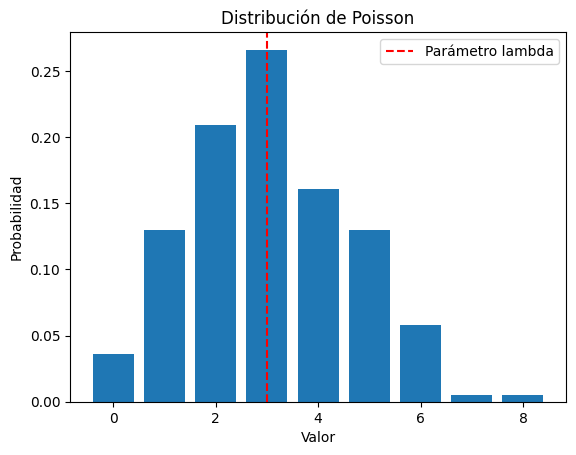

In [20]:
plot_poisson(values_poisson[-1000:],3)

#### Exponencial $\lambda=5$

In [13]:
values_exp=exponentialRvs(l=5,upper=20)

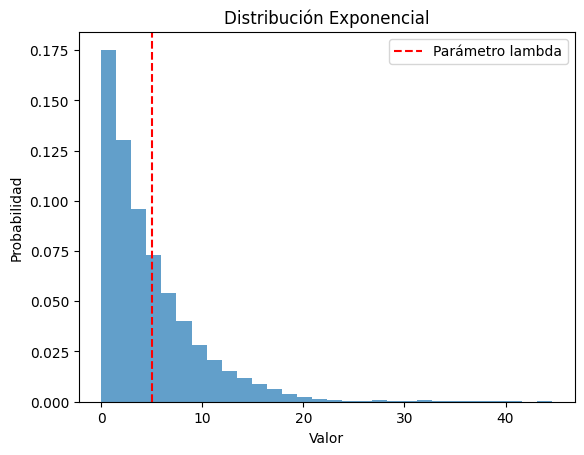

In [14]:
plot_expon(values_exp[15000:],5)

In [37]:
def getTimeUser(index,num_users,ls_time, tail):
    for user in range(int(num_users)):
        wait_time = ls_time.pop(0)
        tail.append((index,wait_time))
        index+=1
    return index, tail

#### Cola de espera

In [79]:
ls_users=list(values_poisson[-1000:])
ls_time= list(map(lambda x: np.math.ceil(x),values_exp[-3000:]))

In [80]:
tail= []
time_close= 180
index= 1
last_arrival=0
time_ini=datetime(2023, 5, 16, 9, 0)
time_format = "%H:%M"

In [81]:
while(time_close>0):
    if(len(tail)==0):
        if(time_close<0):
            print("Cerramos")
            break
        num_users= ls_users.pop(0)
        print(f"La sucursal esta vacia, llegaron {num_users} usuarios a las {time_ini.strftime(time_format)}")
        print("--------------------------------------------------------")
        index,tail = getTimeUser(index,num_users,ls_time, tail)
    turn, time = tail.pop(0)
    last_arrival+= time
    time_after= time_ini+ timedelta(minutes=time) 
    print(f"\tEl turno {turn} estuvo en cajas desde {time_ini.strftime(time_format)} hasta {time_after.strftime(time_format)}")
    time_ini= time_after
    time_close-= time
    if(last_arrival>15):
        if(time_close<0):
            print("Cerramos")
            break
        num_users= ls_users.pop(0)
        index,tail = getTimeUser(index,num_users,ls_time, tail)
        print(f"Llegaron {num_users} usuarios a las {time_ini.strftime(time_format)}")
        print("--------------------------------------------------------")
        last_arrival=0

print("Cerramos")

La sucursal esta vacia, llegaron 5.0 usuarios a las 09:00
--------------------------------------------------------
	El turno 1 estuvo en cajas desde 09:00 hasta 09:01
	El turno 2 estuvo en cajas desde 09:01 hasta 09:02
	El turno 3 estuvo en cajas desde 09:02 hasta 09:03
	El turno 4 estuvo en cajas desde 09:03 hasta 09:04
	El turno 5 estuvo en cajas desde 09:04 hasta 09:05
La sucursal esta vacia, llegaron 5.0 usuarios a las 09:05
--------------------------------------------------------
	El turno 6 estuvo en cajas desde 09:05 hasta 09:06
	El turno 7 estuvo en cajas desde 09:06 hasta 09:08
	El turno 8 estuvo en cajas desde 09:08 hasta 09:09
	El turno 9 estuvo en cajas desde 09:09 hasta 09:10
	El turno 10 estuvo en cajas desde 09:10 hasta 09:12
La sucursal esta vacia, llegaron 5.0 usuarios a las 09:12
--------------------------------------------------------
	El turno 11 estuvo en cajas desde 09:12 hasta 09:14
	El turno 12 estuvo en cajas desde 09:14 hasta 09:18
Llegaron 6.0 usuarios a las 

### Ejemplo del heladero

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

islas = pd.DataFrame({'islas': range(1, 11), 'pob': range(1, 11)})

def caminaIsla(i):
    u = np.random.uniform(0, 1)
    v = i - 1 if u < 0.5 else i + 1
    if v < 1 or v > 10:
        return i
    u2 = np.random.uniform(0, 1)
    p_move = min(islas.loc[v-1, 'pob'] / islas.loc[i-1, 'pob'], 1)
    if p_move > u2:
        return v
    else:
        return i

pasos = 100000
camino = np.zeros(pasos)
camino[0] = np.random.choice(range(1, 11))
for j in range(1, pasos):
    camino[j] = caminaIsla(camino[j-1])

caminata = pd.DataFrame({'pasos': range(1, pasos+1), 'isla': camino})

<Axes: >

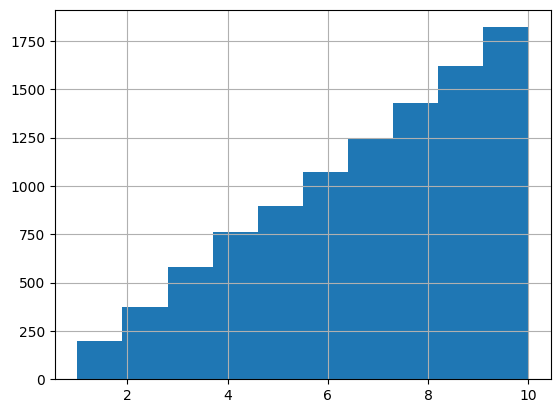

In [13]:
caminata.iloc[:10000,1].hist()